# Rob Crystal-Ornelas <> KS tech assessment

*date completed*: 2022-05-31  
*time to complete*: 120 min

## Defining SQLite schema


Defining SQLite schema for storing data

In [1]:
import sqlite3 as sql

Create connection to our ks database, and name is `ksc.db`

In [2]:
database = "ksc.db"
connection = sql.connect(database)
c = connection.cursor()

First, create the empty SQL strains table, and initialize this code chunk with a comman that removes table if it already exists

In [3]:
connection = sql.connect(database)
c = connection.cursor()
c.execute('''DROP TABLE IF EXISTS strains''')
c.execute(
'''
CREATE TABLE strains(
    strain_id TEXT,
    food_type TEXT,
    food_name TEXT,
    food_production_source TEXT,
    food_retail_source, TEXT)
''').fetchall()
connection.commit()

## Populating schemas though SQL insertion

First, import the library we'll need to read in the CSV file

In [3]:
import pandas as pd

Then, read in the strains CSV file.

In [4]:
strains_df = pd.read_csv('data/strains.csv', skiprows= 0, index_col=False)
strains_df.reset_index(drop=True, inplace=True)

Convert the pd dataframe to a list so that we can use the SQL insertion commands, and save that list as `val`

In [5]:
strain_val = strains_df.values
val = strain_val.tolist()

Run the `executemany` function to do a batch insertion of CSV file rows

In [6]:
sql_code = "INSERT INTO strains (strain_id, food_type, food_name, food_production_source, food_retail_source) VALUES (?, ?, ?, ?, ?)"
c.executemany(sql_code,val)
connection.commit()

Verify that all 50 strains transferred

In [7]:
c.execute("SELECT * FROM strains").fetchall()

[('ST000', 'beverage', 'Good Kombucha', 'USA', 'Wegmans', None),
 ('ST001', 'grain', 'Yummy Bread', 'USA', 'Whole Foods', None),
 ('ST002', 'yogurt', 'Plain Yogurt', 'USA', 'Target', None),
 ('ST003', 'cheese', 'Tasty Cheese', 'USA', 'Safeway', None),
 ('ST004', 'grain', 'Whole Wheat Wonder', 'USA', 'Safeway', None),
 ('ST005', 'grain', "The Rye Guy's Dry Rye", 'USA', 'Whole Foods', None),
 ('ST006', 'grain', 'Lotta Ciabatta', 'USA', 'Whole Foods', None),
 ('ST007', 'yogurt', 'Strawberry Yogurt', 'USA', 'Safeway', None),
 ('ST008', 'beverage', 'Good & Tasty Kombucha', 'USA', 'Target', None),
 ('ST009', 'cheese', 'Betta Chedda', 'USA', 'Target', None),
 ('ST010', 'yogurt', 'Old Style Greek Yogurt', 'USA', 'Safeway', None),
 ('ST011', 'beverage', 'Fun Kombucha', 'USA', 'Wegmans', None),
 ('ST012', 'yogurt', 'New Style Greek Yogurt', 'USA', 'Wegmans', None),
 ('ST013', 'grain', 'Naan Better Naan Bread', 'USA', 'Wegmans', None),
 ('ST014', 'grain', "Sourdoughn't Let Me Down", 'USA', 'Whole

### Repeat process for `tubes`

In [12]:
c.execute('''DROP TABLE IF EXISTS tubes''')
c.execute(
'''
CREATE TABLE tubes(
    tube_id TEXT,
    strain_id TEXT,
    tube_type TEXT,
    tube_size TEXT,
    freezer, TEXT)
''').fetchall()
connection.commit()

In [13]:
tubes_df = pd.read_csv('data/tubes.csv', skiprows= 0, index_col=False)
tubes_df.reset_index(drop=True, inplace=True)
tubes_val = tubes_df.values
tubes_val = tubes_val.tolist()

In [14]:
sql_code = "INSERT INTO tubes (tube_id, strain_id, tube_type, tube_size, freezer) VALUES (?, ?, ?, ?, ?)"
c.executemany(sql_code,tubes_val)
connection.commit()

Aside from missing values here, also noticing that tube sizes are not constrained to just 50, 1000, 150, 200 due to typos

In [15]:
c.execute("SELECT * FROM tubes").fetchall()

[('T000', 'ST020', 'REMP', '100mL', 'F002', None),
 ('T001', 'ST050', 'Thermo', '100mL', 'F002', None),
 ('T002', 'ST050', 'Thermo', '150mL', 'F000', None),
 ('T003', 'ST047', 'REMP', '150mL', 'F001', None),
 ('T004', 'ST012', None, '150mL', 'F002', None),
 ('T005', 'ST012', 'REMP', '50mL', 'F002', None),
 ('T006', 'ST018', 'REMP', '100mL', 'F001', None),
 ('T007', 'ST018', 'REMP', '100mL', 'F000', None),
 ('T008', 'ST036', 'REMP', '200mL', 'F001', None),
 ('T009', 'ST036', 'Thermo', '50mL', 'F002', None),
 ('T010', 'ST036', 'REMP', None, 'F000', None),
 ('T011', 'ST038', 'REMP', '200mL', 'F000', None),
 ('T012', 'ST038', 'Thermo', '50mL', 'F002', None),
 ('T013', 'ST038', 'REMP', '200mL', 'F002', None),
 ('T014', 'ST028', 'REMP', '150mL', 'F000', None),
 ('T015', 'ST028', 'Thermo', '50mL', 'F001', None),
 ('T016', 'ST028', 'Thermo', '100mL', 'F002', None),
 ('T017', 'ST022', 'REMP', '150mL', 'F001', None),
 ('T018', 'ST022', 'Thermo', '5mL', 'F000', None),
 ('T019', 'ST022', 'Thermo',

### Repeat process for `tubes`

In [16]:
c.execute('''DROP TABLE IF EXISTS readings''')
c.execute(
'''
CREATE TABLE readings(
    reading_id TEXT,
    tube_id TEXT,
    lactate_concentration FLOAT,
    acetate_concentration FLOAT)
''').fetchall()
connection.commit()

In [17]:
readings_df = pd.read_csv('data/readings.csv')

In [18]:
readings_val = readings_df.values
readings_val = readings_val.tolist()

In [19]:
sql_code = "INSERT INTO readings (reading_id, tube_id, lactate_concentration, acetate_concentration) VALUES (?, ?, ?, ?)"
c.executemany(sql_code,readings_val)
connection.commit()

In [20]:
c.execute("SELECT * FROM readings").fetchall()

[('R000', 'T066', 0.0568298934012768, 0.2453218303730089),
 ('R001', 'T004', 0.2932616847829479, 0.4269951113737567),
 ('R002', 'T090', 0.8324842854991025, 0.1105389258617476),
 ('R003', 'T034', 0.056615413459963, 0.8412724736881942),
 ('R004', 'T069', 0.454220044628711, 0.0530286131985474),
 ('R005', 'T091', 0.4458343315714985, 0.5272186500040955),
 ('R006', 'T019', 0.6550470163467664, 0.2014450543707556),
 ('R007', 'T100', 0.887447930798864, 0.4037870132126452),
 ('R008', 'T007', 0.510148603046528, 0.4189951696626058),
 ('R009', 'T088', 0.6039472440235071, 0.174122167033192),
 ('R010', 'T070', 0.1374622841784989, 0.6438370172622969),
 ('R011', 'T040', 0.0143480353894781, 0.0287241712001289),
 ('R012', 'T101', 0.5798813956504907, 0.67095114373193),
 ('R013', 'T079', 0.2066920411693551, 0.5260799143337935),
 ('R014', 'T099', 0.261336164967925, 0.4317596331621213),
 ('R015', 'T113', 0.4431326476283793, 0.8936050544752528),
 ('R016', 'T056', 0.7957342790436343, 0.0019954382628067),
 ('R0

## Inconsistent data

In the `tubes.csv` data file, the `tube_type` are constrained to only REMP and Thermo. However, in that column we have RAMP as a tube type and this should be converted to REMP. There are other missing (`none`) tube_types and tube_sizes. Given project time constraints, I'll simply remove those. However, if given more time I would build interactive plotly dashboard to flag  the `nan` so we do not have to discard any rows of data. Moreover, I would work with data collectors to understand why we are getting unexpected tube_sizes of 5ml, 1ml and 2ml. It's possible that each of these represent 50ml, 100ml, and 200ml respectively, if that turned out to be the case, I could replace the smaller tube_sizes with the correct values.

In the readings CSV files all concentrations should be non-negative and I will convert any negative readings to positive for this analysis. However, in practice, I would consult with scientists to determine if conentration sensors should be recalibrated. Also, while I've elected to remove missing values for this assessment, I typically would impute missing continue values like the concentration values we have here with multivariate imputation by chained analysis.

## Exploring inconsistent data

In [21]:
tubes_df['tube_type'].unique()

array(['REMP', 'Thermo', nan, 'RAMP'], dtype=object)

In [22]:
tubes_df['tube_size'].unique()

array(['100mL', '150mL', '50mL', '200mL', nan, '5mL', '1mL', '2mL'],
      dtype=object)

In [23]:
tubes_df['tube_id'].unique()

array(['T000', 'T001', 'T002', 'T003', 'T004', 'T005', 'T006', 'T007',
       'T008', 'T009', 'T010', 'T011', 'T012', 'T013', 'T014', 'T015',
       'T016', 'T017', 'T018', 'T019', 'T020', 'T021', 'T022', 'T023',
       'T024', 'T025', 'T026', 'T027', 'T028', 'T029', 'T030', 'T031',
       'T032', 'T033', 'T034', 'T035', 'T036', 'T037', 'T038', 'T039',
       'T040', 'T041', 'T042', 'T043', 'T044', 'T045', 'T046', 'T047',
       'T048', 'T049', 'T050', 'T051', 'T052', 'T053', 'T054', 'T055',
       'T056', 'T057', 'T058', 'T059', 'T060', 'T061', 'T062', 'T063',
       'T064', 'T065', 'T066', 'T067', 'T068', 'T069', 'T070', 'T071',
       'T072', 'T073', 'T074', 'T075', 'T076', 'T077', 'T078', 'T079',
       'T080', 'T081', 'T082', 'T083', 'T084', 'T085', 'T086', 'T087',
       'T088', 'T089', 'T090', 'T091', 'T092', 'T093', 'T094', 'T095',
       'T096', 'T097', 'T098', 'T099', 'T100', 'T101', 'T102', 'T103',
       'T104', 'T105', 'T106', 'T107', 'T108', 'T109', 'T110', 'T111',
      

In [24]:
readings_df['tube_id'].unique()

array(['T066', 'T004', 'T090', 'T034', 'T069', 'T091', 'T019', 'T100',
       'T007', 'T088', 'T070', 'T040', 'T101', 'T079', 'T099', 'T113',
       'T056', 'T012', 'T027', 'T050', 'T119', 'T093', 'T117', 'T042',
       'T118', 'T006', 'T076', 'T062', 'T014', 'T083', 'T104', 'T055',
       'T052', 'T080', 'T108', 'T047', 'T095', 'T107', 'T068', 'T003',
       'T092', 'T067', 'T046', 'T029', 'T061', 'T053', 'T105', 'T106',
       'T110', 'T086', 'T082', 'T035', 'T049', 'T000', 'T098', 'T085',
       'T081', 'T065', 'T002', 'T022', 'T009', 'T123', 'T087', 'T084',
       'T021', 'T060', 'T045', 'T054', 'T008', 'T103', 'T033', 'T058',
       'T023', 'T051', 'T097', 'T109', 'T030', 'T115', 'T001', 'T010',
       'T043', 'T005', 'T015', 'T017', 'T041', 'T121', 'T116', 'T038',
       'T124', 'T016', 'T111', 'T057', 'T025', 'T064', 'T094', 'T1080',
       'T063', 'T020', 'T114', 'T122', 'T037', 'T032', 'T039', 'T112',
       'T018', 'T044', 'T031', 'T048', 'T072', 'T120', 'T102', 'T059',
     

## Cleaning inconsistent data

In tubes, replace RAMP with REMP, remove nan and inconsistent tube sizes

In [25]:
c.execute("SELECT * FROM tubes").fetchall()

[('T000', 'ST020', 'REMP', '100mL', 'F002', None),
 ('T001', 'ST050', 'Thermo', '100mL', 'F002', None),
 ('T002', 'ST050', 'Thermo', '150mL', 'F000', None),
 ('T003', 'ST047', 'REMP', '150mL', 'F001', None),
 ('T004', 'ST012', None, '150mL', 'F002', None),
 ('T005', 'ST012', 'REMP', '50mL', 'F002', None),
 ('T006', 'ST018', 'REMP', '100mL', 'F001', None),
 ('T007', 'ST018', 'REMP', '100mL', 'F000', None),
 ('T008', 'ST036', 'REMP', '200mL', 'F001', None),
 ('T009', 'ST036', 'Thermo', '50mL', 'F002', None),
 ('T010', 'ST036', 'REMP', None, 'F000', None),
 ('T011', 'ST038', 'REMP', '200mL', 'F000', None),
 ('T012', 'ST038', 'Thermo', '50mL', 'F002', None),
 ('T013', 'ST038', 'REMP', '200mL', 'F002', None),
 ('T014', 'ST028', 'REMP', '150mL', 'F000', None),
 ('T015', 'ST028', 'Thermo', '50mL', 'F001', None),
 ('T016', 'ST028', 'Thermo', '100mL', 'F002', None),
 ('T017', 'ST022', 'REMP', '150mL', 'F001', None),
 ('T018', 'ST022', 'Thermo', '5mL', 'F000', None),
 ('T019', 'ST022', 'Thermo',

In [26]:
c.execute("SELECT tube_id, strain_id, REPLACE(tube_type, 'RAMP', 'REMP'), tube_size, freezer FROM tubes").fetchall()
connection.commit()

In [27]:
c.execute("DELETE FROM tubes WHERE tube_type IS NULL OR tube_size IS NULL OR freezer IS NULL or tube_size = '5mL' OR tube_size = '1mL' OR tube_size = '2mL' OR tube_size IS NULL").fetchall()
connection.commit()

In [28]:
c.execute("SELECT * FROM tubes").fetchall()

[('T000', 'ST020', 'REMP', '100mL', 'F002', None),
 ('T001', 'ST050', 'Thermo', '100mL', 'F002', None),
 ('T002', 'ST050', 'Thermo', '150mL', 'F000', None),
 ('T003', 'ST047', 'REMP', '150mL', 'F001', None),
 ('T005', 'ST012', 'REMP', '50mL', 'F002', None),
 ('T006', 'ST018', 'REMP', '100mL', 'F001', None),
 ('T007', 'ST018', 'REMP', '100mL', 'F000', None),
 ('T008', 'ST036', 'REMP', '200mL', 'F001', None),
 ('T009', 'ST036', 'Thermo', '50mL', 'F002', None),
 ('T011', 'ST038', 'REMP', '200mL', 'F000', None),
 ('T012', 'ST038', 'Thermo', '50mL', 'F002', None),
 ('T013', 'ST038', 'REMP', '200mL', 'F002', None),
 ('T014', 'ST028', 'REMP', '150mL', 'F000', None),
 ('T015', 'ST028', 'Thermo', '50mL', 'F001', None),
 ('T016', 'ST028', 'Thermo', '100mL', 'F002', None),
 ('T017', 'ST022', 'REMP', '150mL', 'F001', None),
 ('T019', 'ST022', 'Thermo', '50mL', 'F001', None),
 ('T020', 'ST022', 'Thermo', '150mL', 'F002', None),
 ('T021', 'ST019', 'REMP', '150mL', 'F002', None),
 ('T022', 'ST019', '

convert negative concentrations to positive

In [29]:
c.execute('SELECT reading_id, tube_id, ABS(lactate_concentration), ABS(acetate_concentration) FROM readings').fetchall()
connection.commit()

In [30]:
c.execute("DELETE FROM readings WHERE lactate_concentration IS NULL OR acetate_concentration IS NULL OR reading_id IS NULL OR tube_id IS NULL").fetchall()
connection.commit()

## SQL Queries

#### How many distinct strains exist per food type?

In [31]:
distinct_per_food_type = c.execute('SELECT food_type, COUNT (DISTINCT strain_id) FROM strains GROUP BY food_type').fetchall()

In [32]:
distinct_per_food_type

[('beverage', 17), ('cheese', 11), ('grain', 11), ('yogurt', 11)]

#### How many distinct strains exist in each freezer?

In [33]:
distinct_per_freezer = c.execute('SELECT freezer, COUNT (DISTINCT strain_id) FROM tubes GROUP BY freezer').fetchall()

In [34]:
distinct_per_freezer

[('F000', 28), ('F001', 27), ('F002', 33)]

#### What is the average lactate concentration across all readings for strains with the “beverage” type?

In [35]:
avg_lac_for_beverage = c.execute('SELECT strains.food_type, AVG(readings.lactate_concentration) FROM strains LEFT JOIN tubes ON strains.strain_id = tubes.strain_id LEFT JOIN readings ON tubes.tube_id = readings.tube_id').fetchall()

In [36]:
avg_lac_for_beverage

[('beverage', 0.498828286849221)]

#### For what strains have we ever recorded an acetate concentration > 0.5?

In [37]:
high_acetate = c.execute('SELECT DISTINCT strains.strain_id FROM strains LEFT JOIN tubes ON strains.strain_id = tubes.strain_id LEFT JOIN readings ON tubes.tube_id = readings.tube_id WHERE readings.acetate_concentration > 0.5').fetchall()

In [38]:
high_acetate

[('ST000',),
 ('ST001',),
 ('ST002',),
 ('ST003',),
 ('ST005',),
 ('ST006',),
 ('ST007',),
 ('ST008',),
 ('ST009',),
 ('ST010',),
 ('ST011',),
 ('ST012',),
 ('ST013',),
 ('ST014',),
 ('ST015',),
 ('ST016',),
 ('ST017',),
 ('ST018',),
 ('ST019',),
 ('ST020',),
 ('ST021',),
 ('ST022',),
 ('ST023',),
 ('ST024',),
 ('ST025',),
 ('ST026',),
 ('ST027',),
 ('ST028',),
 ('ST029',),
 ('ST030',),
 ('ST031',),
 ('ST032',),
 ('ST033',),
 ('ST034',),
 ('ST035',),
 ('ST036',),
 ('ST037',),
 ('ST038',),
 ('ST039',),
 ('ST040',),
 ('ST042',),
 ('ST044',),
 ('ST043',),
 ('ST045',),
 ('ST046',),
 ('ST047',),
 ('ST048',),
 ('ST049',),
 ('ST050',)]

#### What is the average acetate concentration across all readings per food retail source?

In [39]:
avg_acetate_per_source = c.execute('SELECT strains.food_retail_source, AVG(readings.acetate_concentration) FROM strains LEFT JOIN tubes ON strains.strain_id = tubes.strain_id LEFT JOIN readings ON tubes.tube_id = readings.tube_id GROUP BY strains.food_retail_source').fetchall()

In [40]:
avg_acetate_per_source

[('Safeway', 0.503277926807274),
 ('Target', 0.5038257483975188),
 ('Wegmans', 0.5008843442113391),
 ('Whole Foods', 0.5165345726746591)]

### Saving values in dictionary for quick dashboard view

In [50]:
ks_dict = {
    'distinct_per_food_type': distinct_per_food_type,
    'distinct_per_freezer': distinct_per_freezer,
    'avg_lac_for_beverage': avg_lac_for_beverage,
    'high_acetate': high_acetate,
    'avg_acetate_per_source':avg_acetate_per_source
    
}

In [51]:
ks_dict

{'distinct_per_food_type': [('beverage', 17),
  ('cheese', 11),
  ('grain', 11),
  ('yogurt', 11)],
 'distinct_per_freezer': [('F000', 28), ('F001', 27), ('F002', 33)],
 'avg_lac_for_beverage': [('beverage', 0.498828286849221)],
 'high_acetate': [('ST000',),
  ('ST001',),
  ('ST002',),
  ('ST003',),
  ('ST005',),
  ('ST006',),
  ('ST007',),
  ('ST008',),
  ('ST009',),
  ('ST010',),
  ('ST011',),
  ('ST012',),
  ('ST013',),
  ('ST014',),
  ('ST015',),
  ('ST016',),
  ('ST017',),
  ('ST018',),
  ('ST019',),
  ('ST020',),
  ('ST021',),
  ('ST022',),
  ('ST023',),
  ('ST024',),
  ('ST025',),
  ('ST026',),
  ('ST027',),
  ('ST028',),
  ('ST029',),
  ('ST030',),
  ('ST031',),
  ('ST032',),
  ('ST033',),
  ('ST034',),
  ('ST035',),
  ('ST036',),
  ('ST037',),
  ('ST038',),
  ('ST039',),
  ('ST040',),
  ('ST042',),
  ('ST044',),
  ('ST043',),
  ('ST045',),
  ('ST046',),
  ('ST047',),
  ('ST048',),
  ('ST049',),
  ('ST050',)],
 'avg_acetate_per_source': [('Safeway', 0.503277926807274),
  ('Targ

## Dataviz

First use SQL query to obtain the data we need to plot, then convert to pandas df

In [52]:
list_for_plot = c.execute('SELECT readings.tube_id, strains.food_type, AVG(acetate_concentration) FROM strains LEFT JOIN tubes ON strains.strain_id = tubes.strain_id LEFT JOIN readings ON tubes.tube_id = readings.tube_id GROUP BY readings.tube_id').fetchall()

In [53]:
df_for_plot = pd.DataFrame(list_for_plot, columns = ['tube_id','food_type','avg_lactate_concentration'])

In [54]:
df_for_plot = df_for_plot.iloc[1:, :]

In [55]:
df_for_plot.head()

,tube_id,food_type,avg_lactate_concentration
1,T000,cheese,0.452917
2,T001,beverage,0.529337
3,T002,beverage,0.538195
4,T003,beverage,0.431485
5,T005,yogurt,0.568815


My preferred data viz library in python is `seaborn`. I use that library below to create categorical scatterplot of average lactate values by tube, separated by food_type

In [56]:
import seaborn as sns

In [57]:
df_for_plot.head()

,tube_id,food_type,avg_lactate_concentration
1,T000,cheese,0.452917
2,T001,beverage,0.529337
3,T002,beverage,0.538195
4,T003,beverage,0.431485
5,T005,yogurt,0.568815


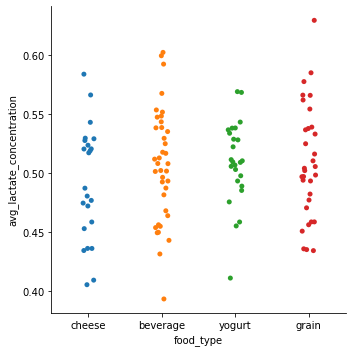

In [58]:
sns.catplot(
data = df_for_plot,
x = 'food_type',
y = 'avg_lactate_concentration');